In [1]:
# Installing the necessary modules
!pip install pystan
!pip install Cython
!pip install prophet

INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
      --------------------------------------- 0.3/16.2 MB ? eta -:--:--
     - -------------------------------------- 0.8/16.2 MB 1.8 MB/s eta 0:00:09
     --- ------------------------------------ 1.3/16.2 MB 2.3 MB/s eta 0:00:07
     ----- ---------

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\OKOPI ODUMU\AppData\Local\Temp\pip-install-r50dfgck\pystan_ef895c4924b54b4392b27caf970506d5\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.3 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 2.3 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 2.6 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 1.3 MB/s eta 0:00:10
   --- ------------------------------------ 1.3/13.3 MB 2.2 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/13.3 MB 2.8 MB/s eta 0:00:05
   -------- ------------------------------- 2.9/13.3 MB 2.9 MB/s eta 0:00:04
   ----------- ---------------------------- 3.7/13.3 MB 2.9 MB/s eta 0:00:04
   ------------ --------------------------- 4.2/13.3 MB 3.0 MB/s eta 0:00:04
   -------------- ------------------------- 5.0/13.3 MB 3.1 MB/s eta 0:00:03
   ----------------- ---------------------- 5.8/13.3 MB 3.0 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.3 MB 3.0 MB/s eta 0:00:03
   --------------------- --


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importing the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import prophet
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
#from .autonotebook import tqdm as notebook_tqdm

import warnings
warnings.simplefilter('ignore')

import yfinance as yf
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
yf.pdr_override() 

In [6]:
# Define the Time Frame
start = dt.datetime(2020,1,1)
end = dt.datetime.now()


# Thirdly, load the Training stock data
ticker = 'TSLA'
tesla = yf.download(ticker, start, end)
tesla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2024-12-04,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
2024-12-05,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
2024-12-06,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


In [7]:
# Exporting the data dataframe as csv file
tesla.to_csv("TSLA stock prices.csv")

In [8]:
tesla.reset_index(inplace=True)
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...
1239,2024-12-04,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
1240,2024-12-05,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
1241,2024-12-06,377.420013,389.489990,370.799988,389.220001,389.220001,81455800
1242,2024-12-09,397.609985,404.799988,378.010010,389.790009,389.790009,96359200


In [6]:
tesla.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [9]:
# Extracting the required data
needed_data = tesla[['Date','Close']]
needed_data.head(5)

,Date,Close
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334


In [10]:
# Renaming the columns
needed_data.columns = ["ds", "y"]
needed_data

,ds,y
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
1239,2024-12-04,357.929993
1240,2024-12-05,369.489990
1241,2024-12-06,389.220001
1242,2024-12-09,389.790009


In [9]:
# Check column types
needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1243 non-null   datetime64[ns]
 1   y       1243 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.6 KB


In [11]:
estimated_days=91
df0 = needed_data.copy()
needed_data = needed_data[:-estimated_days]
needed_data

,ds,y
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
1148,2024-07-26,219.800003
1149,2024-07-29,232.100006
1150,2024-07-30,222.619995
1151,2024-07-31,232.070007


In [12]:
df_prophet = prophet.Prophet(changepoint_prior_scale=0.15,
                             yearly_seasonality=True,
                             daily_seasonality=True)
df_prophet.fit(needed_data)

15:21:34 - cmdstanpy - INFO - Chain [1] start processing
15:21:38 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# I am using here 2 * estimated_days: half of it has actual prices to compare with trend values. 
# The second half are new estimated future values.
tesla_forecast = df_prophet.make_future_dataframe(periods= estimated_days*2, freq='D')

#Forecast future prices
tesla_forecast = df_prophet.predict(tesla_forecast)
tesla_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,29.713068,9.991099,66.025795,29.713068,29.713068,9.375307,9.375307,9.375307,12.119927,...,-0.127143,-0.127143,-0.127143,-2.617476,-2.617476,-2.617476,0.0,0.0,0.0,39.088375
1,2020-01-03,29.929676,9.554269,71.419574,29.929676,29.929676,9.768824,9.768824,9.768824,12.119927,...,-0.266540,-0.266540,-0.266540,-2.084563,-2.084563,-2.084563,0.0,0.0,0.0,39.698500
2,2020-01-06,30.579501,15.297109,74.043809,30.579501,30.579501,12.708023,12.708023,12.708023,12.119927,...,1.396838,1.396838,1.396838,-0.808741,-0.808741,-0.808741,0.0,0.0,0.0,43.287524
3,2020-01-07,30.796109,14.994459,71.596081,30.796109,30.796109,12.506957,12.506957,12.506957,12.119927,...,0.937439,0.937439,0.937439,-0.550409,-0.550409,-0.550409,0.0,0.0,0.0,43.303066
4,2020-01-08,31.012717,14.812348,73.035481,31.012717,31.012717,12.810824,12.810824,12.810824,12.119927,...,1.089391,1.089391,1.089391,-0.398493,-0.398493,-0.398493,0.0,0.0,0.0,43.823541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2025-01-26,161.371982,72.686834,251.908799,74.889180,248.215322,0.845344,0.845344,0.845344,12.119927,...,-1.514993,-1.514993,-1.514993,-9.759591,-9.759591,-9.759591,0.0,0.0,0.0,162.217326
1331,2025-01-27,161.256601,75.561875,251.547566,74.340772,248.102117,3.728271,3.728271,3.728271,12.119927,...,1.396838,1.396838,1.396838,-9.788494,-9.788494,-9.788494,0.0,0.0,0.0,164.984871
1332,2025-01-28,161.141219,72.514494,255.783115,73.769502,248.463729,3.383795,3.383795,3.383795,12.119927,...,0.937439,0.937439,0.937439,-9.673570,-9.673570,-9.673570,0.0,0.0,0.0,164.525014
1333,2025-01-29,161.025837,73.469159,257.357027,73.055278,249.362314,3.792632,3.792632,3.792632,12.119927,...,1.089391,1.089391,1.089391,-9.416685,-9.416685,-9.416685,0.0,0.0,0.0,164.818469


In [14]:
#Investigating predicted data for anomalies
tesla_forecast.to_csv("investigate.csv")

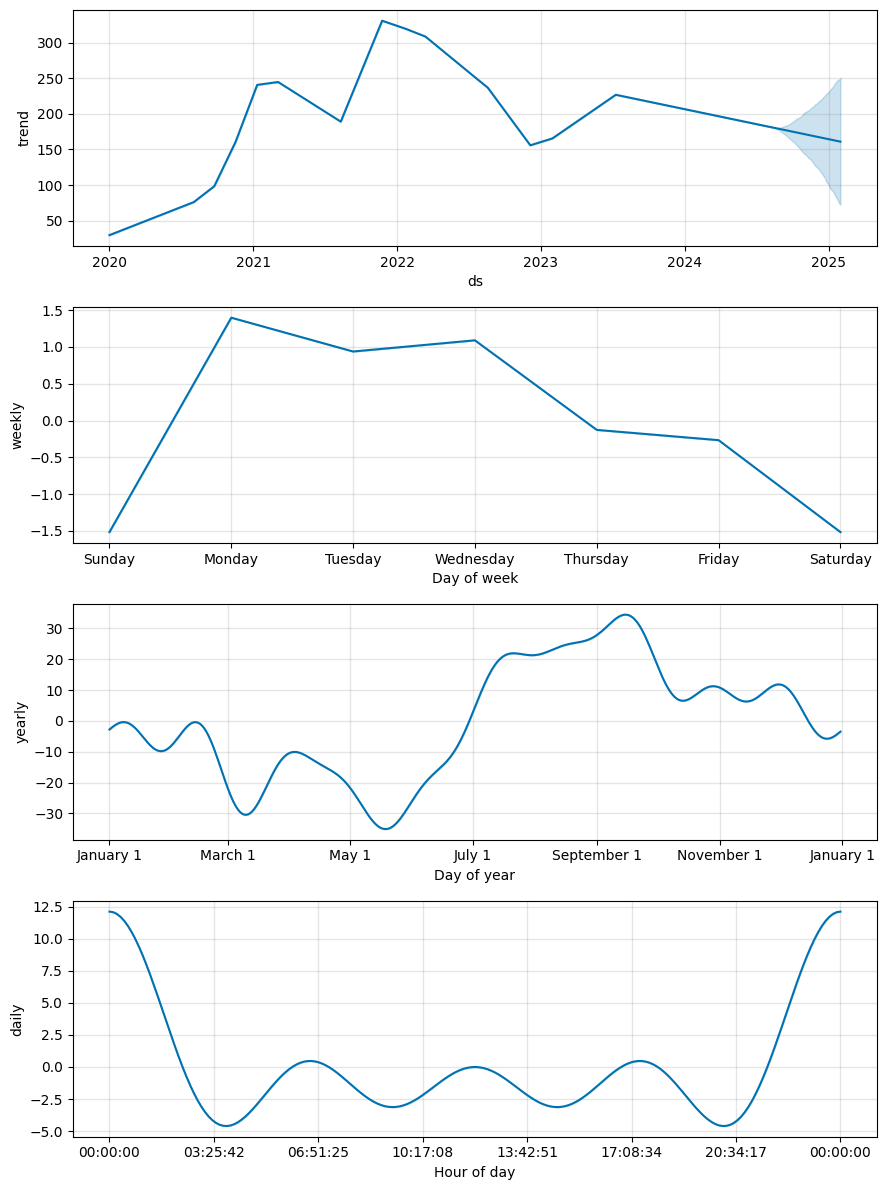

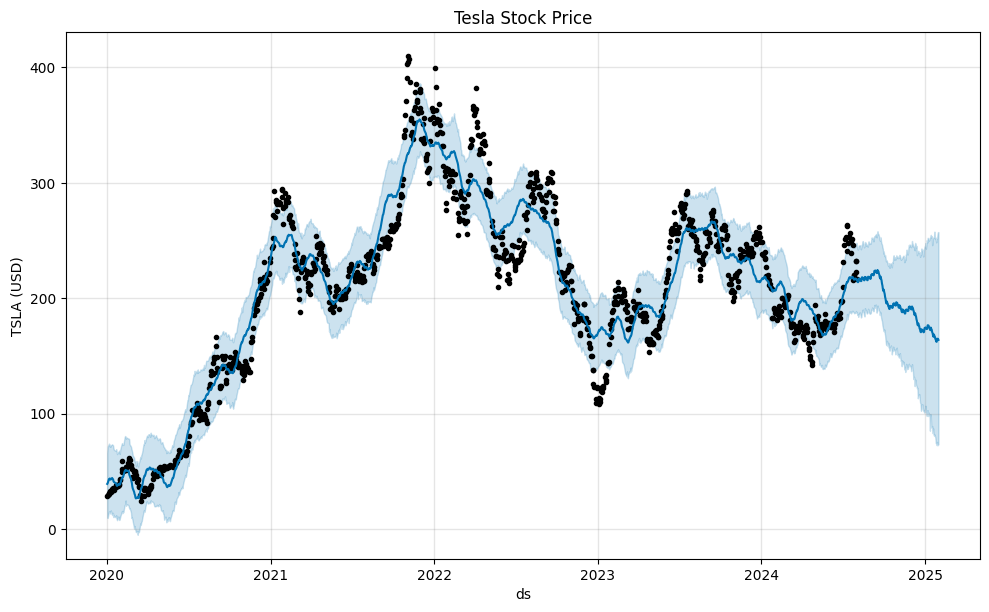

In [15]:
# plot_components() draws 4 graps showing:
#     - trend line
#     - yearly seasonality
#     - weekly seasonality
#     - daily seasonality
df_prophet.plot_components(tesla_forecast)

# Draw forecast results
df_prophet.plot(tesla_forecast, xlabel = 'ds', ylabel = 'TSLA (USD)')

plt.title('Tesla Stock Price')
plt.ylabel('TSLA (USD)')
plt.show()

In [16]:
tesla_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,29.713068,9.991099,66.025795,29.713068,29.713068,9.375307,9.375307,9.375307,12.119927,...,-0.127143,-0.127143,-0.127143,-2.617476,-2.617476,-2.617476,0.0,0.0,0.0,39.088375
1,2020-01-03,29.929676,9.554269,71.419574,29.929676,29.929676,9.768824,9.768824,9.768824,12.119927,...,-0.266540,-0.266540,-0.266540,-2.084563,-2.084563,-2.084563,0.0,0.0,0.0,39.698500
2,2020-01-06,30.579501,15.297109,74.043809,30.579501,30.579501,12.708023,12.708023,12.708023,12.119927,...,1.396838,1.396838,1.396838,-0.808741,-0.808741,-0.808741,0.0,0.0,0.0,43.287524
3,2020-01-07,30.796109,14.994459,71.596081,30.796109,30.796109,12.506957,12.506957,12.506957,12.119927,...,0.937439,0.937439,0.937439,-0.550409,-0.550409,-0.550409,0.0,0.0,0.0,43.303066
4,2020-01-08,31.012717,14.812348,73.035481,31.012717,31.012717,12.810824,12.810824,12.810824,12.119927,...,1.089391,1.089391,1.089391,-0.398493,-0.398493,-0.398493,0.0,0.0,0.0,43.823541


In [18]:
len(tesla)

1243

In [19]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [20]:
tesla.iloc[:,0:5]  

,Date,Open,High,Low,Close
0,2020-01-02,28.299999,28.713333,28.114000,28.684000
1,2020-01-03,29.366667,30.266666,29.128000,29.534000
2,2020-01-06,29.364668,30.104000,29.333332,30.102667
3,2020-01-07,30.760000,31.441999,30.224001,31.270666
4,2020-01-08,31.580000,33.232666,31.215334,32.809334
...,...,...,...,...,...
1238,2024-12-03,351.799988,355.690002,348.200012,351.420013
1239,2024-12-04,353.000000,358.100006,348.600006,357.929993
1240,2024-12-05,359.869995,375.429993,359.500000,369.489990
1241,2024-12-06,377.420013,389.489990,370.799988,389.220001


In [17]:
# Extracting data with common dates with original data
pred_forecast = tesla_forecast.loc[tesla_forecast['ds'].isin(tesla['Date'])]
pred_forecast.iloc[:,0:5]    

,ds,trend,yhat_lower,yhat_upper,trend_lower
0,2020-01-02,29.713068,9.991099,66.025795,29.713068
1,2020-01-03,29.929676,9.554269,71.419574,29.929676
2,2020-01-06,30.579501,15.297109,74.043809,30.579501
3,2020-01-07,30.796109,14.994459,71.596081,30.796109
4,2020-01-08,31.012717,14.812348,73.035481,31.012717
...,...,...,...,...,...
1277,2024-12-04,167.487213,137.293906,247.113686,123.241520
1278,2024-12-05,167.371832,129.905541,244.413324,122.929997
1279,2024-12-06,167.256450,131.912347,244.552577,122.509264
1282,2024-12-09,166.910305,129.236680,247.937039,119.462893


In [25]:
# Installing the cufflinks modules
!pip install cufflinks


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


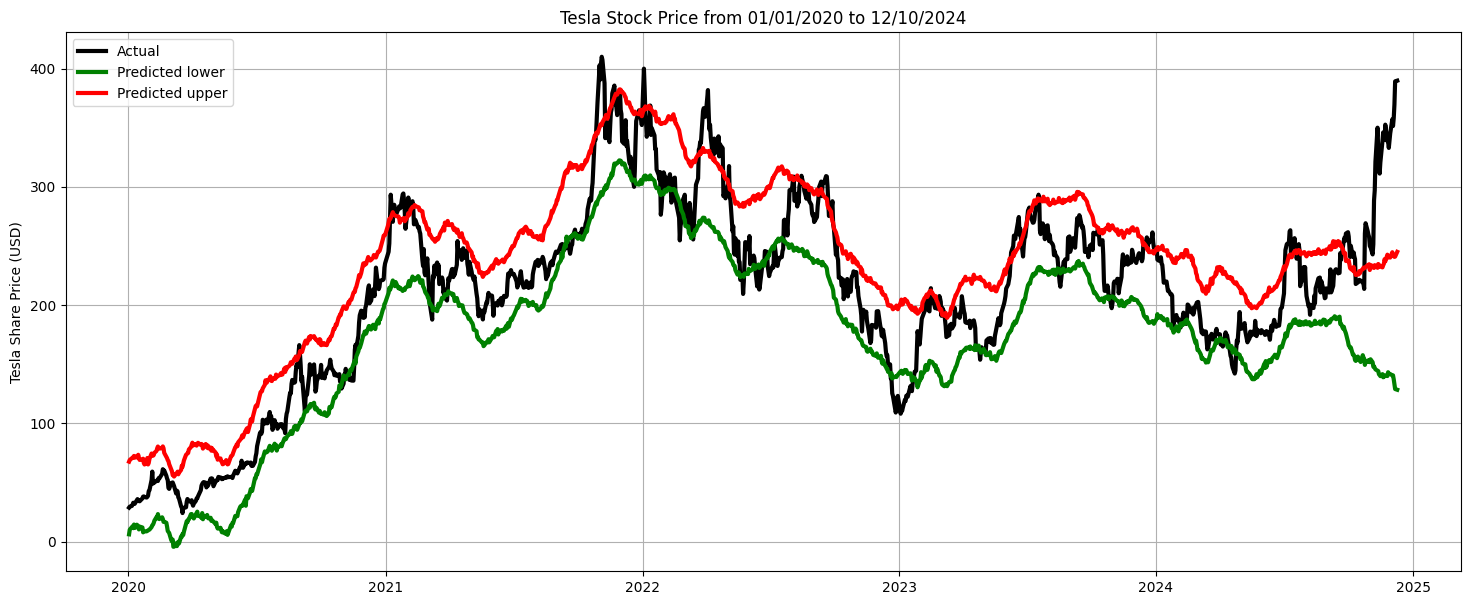

In [29]:
import matplotlib
import matplotlib.pyplot as plt

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 7)

plt.plot(tesla['Date'], tesla['Close'], linestyle='-', label="Actual",linewidth=3, color='black')
plt.plot(pred_forecast['ds'], pred_forecast['yhat_lower'],linestyle='-', label="Predicted lower",linewidth=3, color='green')
plt.plot(pred_forecast['ds'], pred_forecast['yhat_upper'],linestyle='-', label="Predicted upper",linewidth=3, color='red')
plt.grid(True)
plt.legend()
plt.title('Tesla Stock Price from 01/01/2020 to 12/10/2024')
plt.ylabel('Tesla Share Price (USD)')
plt.show()

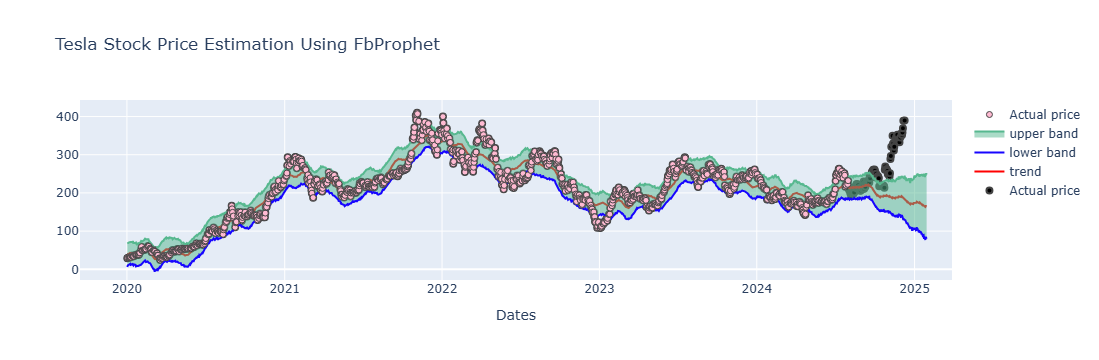

<Figure size 640x480 with 0 Axes>

In [41]:
# To be modify
fig = go.Figure()
trace = go.Scatter(name = 'Actual price', mode = 'markers', x = list(df_forecast['ds']), y = list(needed_data['y']), marker=dict(color='#FFBAD2',line=dict(width=1)))
trace1 = go.Scatter(name = 'trend', mode = 'lines', x = list(df_forecast['ds']), y = list(df_forecast['yhat']), marker=dict(color='red', line=dict(width=3)))
upper_band = go.Scatter(name = 'upper band', mode = 'lines', x = list(df_forecast['ds']), y = list(df_forecast['yhat_upper']), line= dict(color='#57b88f'), fill = 'tonexty')
lower_band = go.Scatter(name= 'lower band', mode = 'lines', x = list(df_forecast['ds']), y = list(df_forecast['yhat_lower']), line= dict(color='#1705ff'))
tracex = go.Scatter(name = 'Actual price', mode = 'markers', x = list(df0['ds']), y = list(df0['y']), marker=dict(color='black',line=dict(width=2)))
tesla = [tracex, trace1, lower_band, upper_band, trace]
layout = dict(title='Tesla Stock Price Estimation Using FbProphet', xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))
fig=dict(data=tesla,layout=layout)
plt.savefig('Tesla Stock Price.png')
py.offline.iplot(fig)
#plt.show()

In [ ]:
#comment
#The TSLA stocks are projected to saor high in the year 2025, politics may play a role here